# Image preprocessing

## Setup

In [127]:
from google.colab import drive
import os, sys, time, subprocess, shutil
from pathlib import Path
import PIL, cv2, albumentations as A
import numpy as np, scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
dir_gdrive = Path('/content/drive/My Drive')

In [6]:
def _cp(src, dst):
    assert src.is_file()
    shutil.copy(src, dst)
    
Path.cp = _cp
Path.ls = lambda o: list(o.iterdir())

## Source images

In [7]:
! cp -r drive/My\ Drive/JPEG_tiles_Main .

In [8]:
! ls

drive  JPEG_tiles_Main	sample_data


In [9]:
dir_src = Path('/content/JPEG_tiles_Main/')

In [10]:
len(dir_src.ls())

2208

## Removing duplicates

In [104]:
fns = dir_src.ls()

There are no duplicated file names.

In [105]:
len(fns), len(set(fns))

(2208, 2208)

However, there are file names with '(1)', which could be duplicate files.

In [111]:
[n.stem for n in dir_src.ls() if ' (1)' in n.name][:3]

['main_4800_1600 (1)', 'main_4800_15600 (1)', 'main_4800_13600 (1)']

For each file name with '(1)', check against the corresponding file without '(1)'.  If the content is the same, then remove the file with '(1)'.  Otherwise, keep it.

In [112]:
BRAC = ' (1)'

In [113]:
fns_brac = [n for n in fns if BRAC in n.stem]
fns_brac[:3], len(fns_brac)

([PosixPath('/content/JPEG_tiles_Main/main_4800_1600 (1).jpeg'),
  PosixPath('/content/JPEG_tiles_Main/main_4800_15600 (1).jpeg'),
  PosixPath('/content/JPEG_tiles_Main/main_4800_13600 (1).jpeg')],
 39)

In [121]:
def is_duplicate(fn_brac):
    fn_nobrac = fn_brac.parent/fn_brac.name.replace(BRAC, '')
    if not fn_nobrac.exists(): return False
    else:
        img_brac, img_nobrac = (np.array(PIL.Image.open(fn)) 
                                for fn in [fn_brac, fn_nobrac])
        return (img_brac - img_nobrac).sum()==0

In [131]:
fns_dup = [fn for fn in fns_brac if is_duplicate(fn)]

Looks like all ' (1)' files are duplicates.

In [132]:
len(fns_dup), len(fns_brac)

(39, 39)

Manually and visually verify.

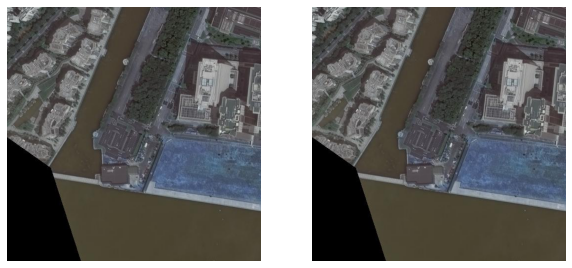

In [138]:
idx = 20
fn_brac = fns_brac[idx]
fn_nobrac = fn_brac.parent/fn_brac.name.replace(BRAC, '')
imgs = (np.array(PIL.Image.open(fn)) for fn in [fn_brac, fn_nobrac])

_, axs = plt.subplots(ncols=2, figsize=(10, 5))
for ax, img in zip(axs, imgs):
    ax.imshow(img)
    ax.axis('off')

### Delete duplicates from disk

In [139]:
for fn in fns_dup: fn.unlink()

In [140]:
all(fn.exists()==False for fn in fns_dup)

True

In [141]:
len(dir_src.ls())

2169

## Convert to RGB

The images are currently saved as BGR arrays.  Convert them to RGB arrays and save to disk.

In [143]:
dir_dst = Path('tiles_-_singapore_main_sz512')
dir_dst.mkdir(exist_ok=True)

In [144]:
for p in dir_dst.ls(): p.unlink()

In [145]:
for p in tqdm(dir_src.ls()):
    img = np.array(PIL.Image.open(p))
    img = img[...,::-1]
    img = PIL.Image.fromarray(img)
    img.save(dir_dst/p.name)

100%|██████████| 2169/2169 [11:31<00:00,  3.14it/s]


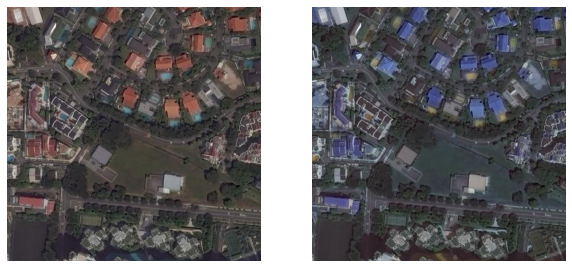

In [159]:
fn_rgb = np.random.choice(dir_dst.ls())
fn_bgr = dir_src/fn_rgb.name

imgs = (np.array(PIL.Image.open(fn)) for fn in [fn_rgb, fn_bgr])
_, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs = axs.flatten()
for ax, img in zip(axs, imgs):
    ax.imshow(img)
    ax.axis('off')

### Save RGB images to Gdrive

In [160]:
! ls

drive  JPEG_tiles_Main	sample_data  tiles_-_singapore_main_sz512


In [ ]:
! zip -r tiles_-_singapore_main_sz512.zip tiles_-_singapore_main_sz512

In [164]:
! du -hs JPEG_tiles_Main/

90M	JPEG_tiles_Main/


In [163]:
! du -hs tiles*

94M	tiles_-_singapore_main_sz512
89M	tiles_-_singapore_main_sz512.zip


In [165]:
! cp tiles_-_singapore_main_sz512.zip /content/drive/My\ Drive/.

## Copy over selected Spacenet images 

*mixed_big* is a set of hand-selected spacenet v2 images provided by Shashank.

In [166]:
! cp -r /content/drive/My\ Drive/mixed_big .

In [ ]:
! zip -r mixed_big.zip mixed_big/

In [172]:
! du -hs mixed_big.zip

68M	mixed_big.zip


In [173]:
! cp mixed_big.zip /content/drive/My\ Drive/.

In [174]:
! ls /content/drive/My\ Drive

 05_esrgan_inference_colab.ipynb
'Colab Notebooks'
 crops_-_well_442_spa_800_sg_500_bicubic_hr128_lr32.zip
 esrgan-pytorch_satellite_images.gsheet
 esrgan_results
 JPEG_tiles_Main
 kaggle_-_wheatabox.gsheet
 lds-wellington-010m-urban-aerial-photos-2017-JPEG-20200805T075359Z-003.zip
 mixed_big
 mixed_big.zip
'Official Folder for Engie project'
 omdena_engie
 tiles_-_singapore_main_sz512.zip
